In [33]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'500',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'bbc34b7f-5db4-4f0e-8dab-6e4868511387',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [34]:
type(data)

dict

In [35]:
import pandas as pd

#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

In [37]:
def api_runner():
    global df
    url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'bbc34b7f-5db4-4f0e-8dab-6e4868511387',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print("Error:", e)
    
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\Ernest\OneDrive\Documents\Python Scripts\Output Folder\CoinMarketCap.csv'):
        df.to_csv(r'C:\Users\Ernest\OneDrive\Documents\Python Scripts\Output Folder\CoinMarketCap.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Ernest\OneDrive\Documents\Python Scripts\Output Folder\CoinMarketCap.csv', mode='a', header=False)      

In [38]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [60]:
df = pd.read_csv(r'C:\Users\Ernest\OneDrive\Documents\Python Scripts\Output Folder\CoinMarketCap.csv')

In [61]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [62]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d
name,,,
8lc83s7lf2d,0.93912,0.20484,0.44047
ru84rudtdq,0.68267,0.34587,0.73870
0dzh4kthiew,0.71715,0.49439,0.36143
lhx14dcueht,0.50198,0.29731,0.24067
pn03f4h37fn,0.20434,0.37495,0.76672
ftjwfn3mtwh,0.43377,0.02902,0.99525
849ibau79q7,0.03446,0.03508,0.01330
pjezr8k2vq8,0.60831,0.47919,0.63874
cbhfm8qmpf,0.47274,0.17553,0.44129


In [63]:
df4 = df3.stack()
df4

type(df4)

pandas.core.series.Series

In [64]:
df5 = df4.to_frame(name='values')
df5

values
name                                            
8lc83s7lf2d quote.USD.percent_change_1h  0.93912
            quote.USD.percent_change_24h 0.20484
            quote.USD.percent_change_7d  0.44047
ru84rudtdq  quote.USD.percent_change_1h  0.68267
            quote.USD.percent_change_24h 0.34587
            quote.USD.percent_change_7d  0.73870
0dzh4kthiew quote.USD.percent_change_1h  0.71715
            quote.USD.percent_change_24h 0.49439
            quote.USD.percent_change_7d  0.36143
lhx14dcueht quote.USD.percent_change_1h  0.50198
            quote.USD.percent_change_24h 0.29731
            quote.USD.percent_change_7d  0.24067
pn03f4h37fn quote.USD.percent_change_1h  0.20434
            quote.USD.percent_change_24h 0.37495
            quote.USD.percent_change_7d  0.76672
ftjwfn3mtwh quote.USD.percent_change_1h  0.43377
            quote.USD.percent_change_24h 0.02902
            quote.USD.percent_change_7d  0.99525
849ibau79q7 quote.USD.percent_change_1h  0.03446
            quote.USD.percent_change_24h 0.03508
            quote.USD.percent_change_7d  0.01330
pjezr8k2vq8 quote.USD.percent_change_1h  0.60831
            quote.USD.percent_change_24h 0.47919
            quote.USD.percent_change_7d  0.63874
cbhfm8qmpf  quote.USD.percent_change_1h  0.47274
            quote.USD.percent_change_24h 0.17553
            quote.USD.percent_change_7d  0.44129
kc7m6jxsb5a quote.USD.percent_change_1h  0.17588
            quote.USD.percent_change_24h 0.28462
            quote.USD.percent_change_7d  0.04252

In [65]:
df5.count()

values    30
dtype: int64

In [67]:
# Reset the old index
df6 = df5.reset_index()

df6

,name,level_1,values
0,8lc83s7lf2d,quote.USD.percent_change_1h,0.93912
1,8lc83s7lf2d,quote.USD.percent_change_24h,0.20484
2,8lc83s7lf2d,quote.USD.percent_change_7d,0.44047
3,ru84rudtdq,quote.USD.percent_change_1h,0.68267
4,ru84rudtdq,quote.USD.percent_change_24h,0.34587
5,ru84rudtdq,quote.USD.percent_change_7d,0.73870
6,0dzh4kthiew,quote.USD.percent_change_1h,0.71715
7,0dzh4kthiew,quote.USD.percent_change_24h,0.49439
8,0dzh4kthiew,quote.USD.percent_change_7d,0.36143
9,lhx14dcueht,quote.USD.percent_change_1h,0.50198


In [68]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,8lc83s7lf2d,quote.USD.percent_change_1h,0.93912
1,8lc83s7lf2d,quote.USD.percent_change_24h,0.20484
2,8lc83s7lf2d,quote.USD.percent_change_7d,0.44047
3,ru84rudtdq,quote.USD.percent_change_1h,0.68267
4,ru84rudtdq,quote.USD.percent_change_24h,0.34587
5,ru84rudtdq,quote.USD.percent_change_7d,0.73870
6,0dzh4kthiew,quote.USD.percent_change_1h,0.71715
7,0dzh4kthiew,quote.USD.percent_change_24h,0.49439
8,0dzh4kthiew,quote.USD.percent_change_7d,0.36143
9,lhx14dcueht,quote.USD.percent_change_1h,0.50198


In [71]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d'],['1h','24h','7d'])
df7

,name,percent_change,values
0,8lc83s7lf2d,1h,0.93912
1,8lc83s7lf2d,24h,0.20484
2,8lc83s7lf2d,7d,0.44047
3,ru84rudtdq,1h,0.68267
4,ru84rudtdq,24h,0.34587
5,ru84rudtdq,7d,0.73870
6,0dzh4kthiew,1h,0.71715
7,0dzh4kthiew,24h,0.49439
8,0dzh4kthiew,7d,0.36143
9,lhx14dcueht,1h,0.50198


In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

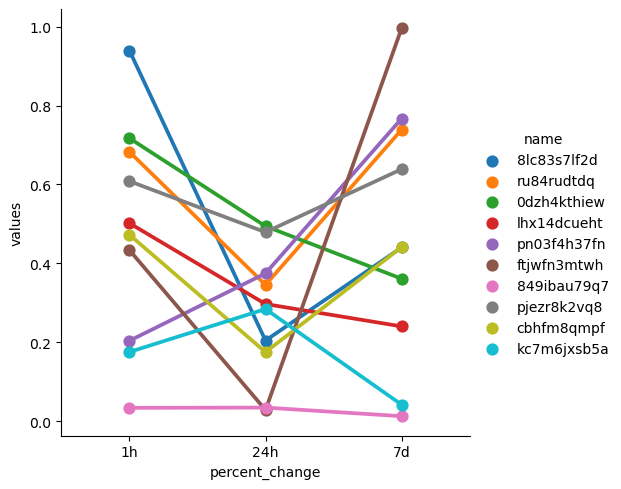

In [72]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')